# Bike Sharing Assgnment

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading Dataset and Understanding Data

In [3]:
df = pd.read_csv(r"C:\Users\chhab\Downloads\day (1).csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Missing Value Check

In [7]:
# % of missing values in each column
100*df.isnull().mean().sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# % of missing values row wise
round((df.isnull().sum(axis=1)/len(df))*100,2).sort_values(ascending=False)


0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [9]:
df.columns.to_list()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

## Preprocessing Steps

### Renaming the columns for better readability

In [10]:
df.rename(columns={'yr':'year','mnth':'month','temp':'temperature','hum':'humidity','cnt':'count'},inplace=True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
df.size

11680

### Duplicate Check

In [12]:
df_dupli = df.copy()

In [13]:
df_dupli.drop_duplicates(subset=None,inplace=True)

In [14]:
df_dupli.shape

(730, 16)

In [15]:
df.shape

(730, 16)

### Cleaning Data

In [16]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [17]:
df1 = df[['season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temperature', 'atemp', 'humidity', 'windspeed', 'count']]

df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# categorical columns
cat_cols = [col for col in df1.columns if df1[col].nunique()<=30]
num_cols = [col for col in df1.columns if df1[col].nunique() >30]

In [19]:
print(cat_cols)
print(num_cols)

['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
['temperature', 'atemp', 'humidity', 'windspeed', 'count']


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    int64  
 1   year         730 non-null    int64  
 2   month        730 non-null    int64  
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    int64  
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    int64  
 7   temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  count        730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Mapping the categorical variables

In [21]:
season_name = {1:'spring',2:'summer',3:'fall',4:'winter'}
df1['season'] = df1['season'].map(season_name)

month_name = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9:'Sept', 10 : 'Oct', 11: 'Nov', 12: 'Dec'}
df1['month'] = df1['month'].map(month_name)

weathersit_name = {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'}
df1['weathersit'] = df1['weathersit'].map(weathersit_name)

weekday_name = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thur', 5: 'Fri', 6: 'Sat'}
df1['weekday'] = df1['weekday'].map(weekday_name)

df1.head()


,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
for col in cat_cols:
    print(df1[col].value_counts(),'\n\n')

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64 


year
0    365
1    365
Name: count, dtype: int64 


month
Jan     62
Mar     62
May     62
Jul     62
Aug     62
Oct     62
Dec     62
Apr     60
Jun     60
Sept    60
Nov     60
Feb     56
Name: count, dtype: int64 


holiday
0    709
1     21
Name: count, dtype: int64 


weekday
Mon     105
Tue     105
Wed     104
Thur    104
Fri     104
Sat     104
Sun     104
Name: count, dtype: int64 


workingday
1    504
0    226
Name: count, dtype: int64 


weathersit
Clear            463
Mist + Cloudy    246
Light Snow        21
Name: count, dtype: int64 




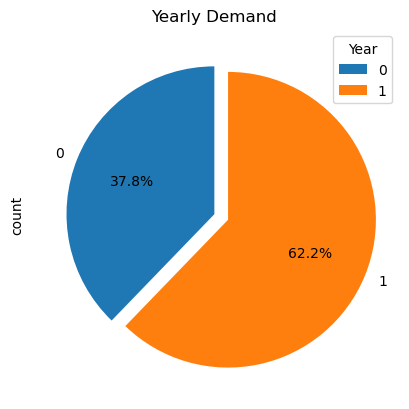

In [23]:
yearly_demand = df1.groupby('year')['count'].sum()
explode = [0.1 if i == 1 else 0 for i in range(len(yearly_demand))]
labels = yearly_demand.index.tolist()
df1.groupby('year')['count'].sum().plot.pie(explode=explode, autopct='%1.1f%%', startangle=90,labels=labels)
plt.legend(labels, title="Year", loc="best")
plt.title('Yearly Demand')
plt.show()


## Exploratory Data Analysis

### Data visualization 

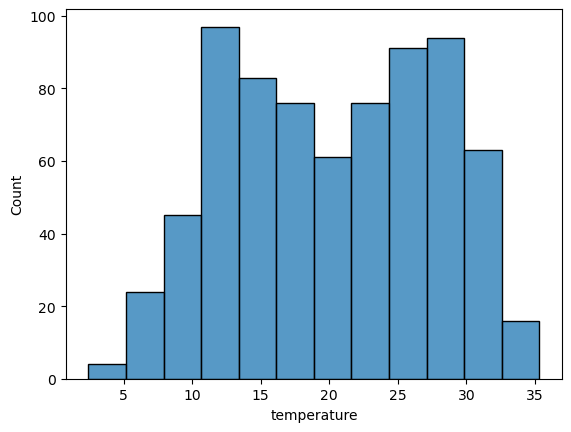

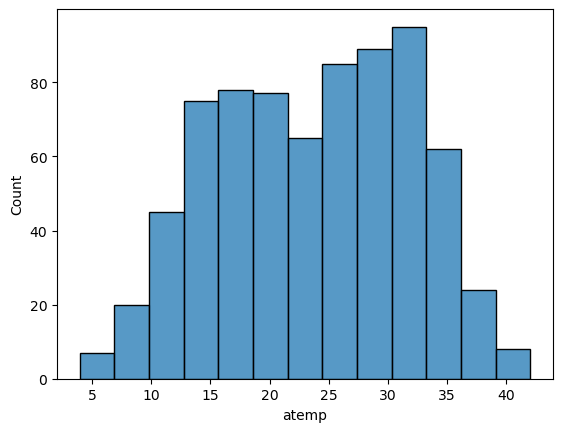

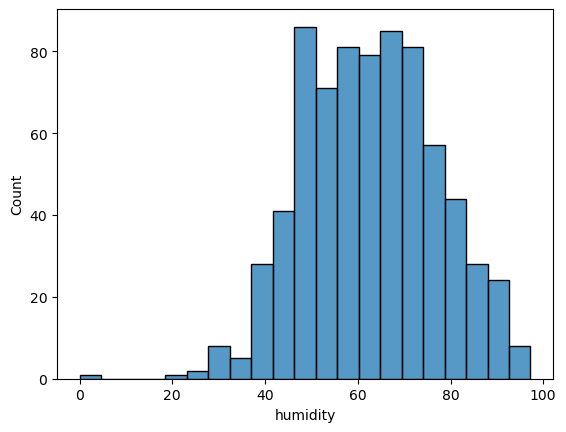

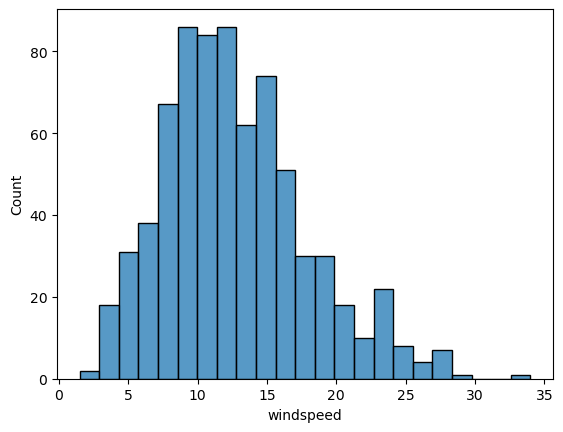

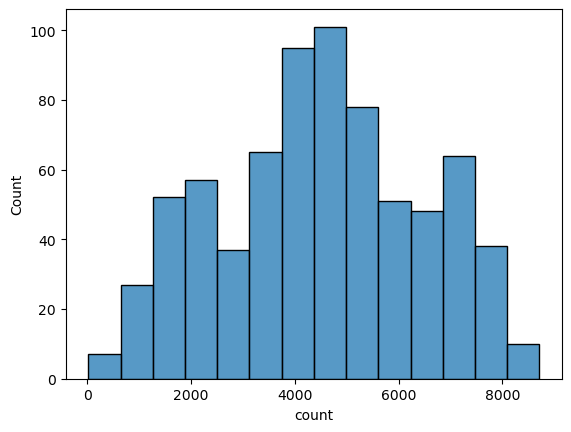

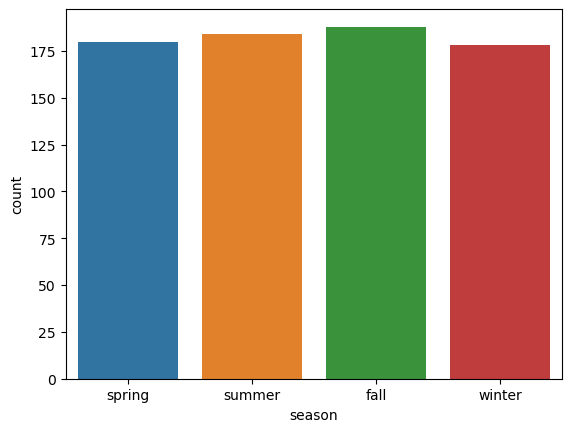

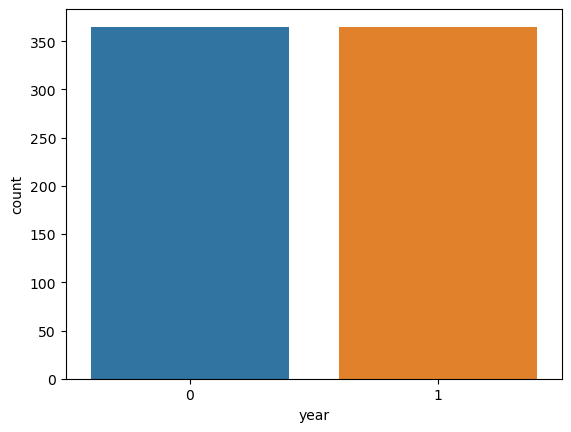

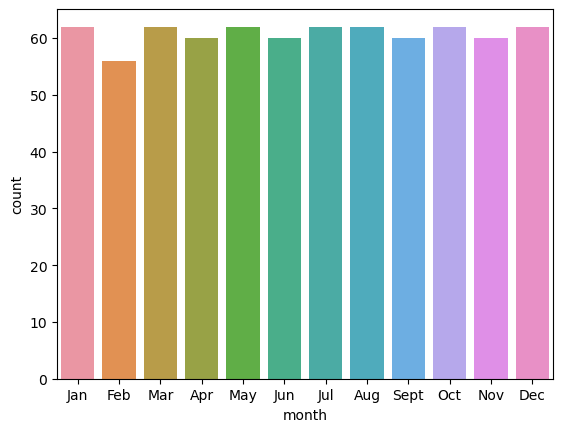

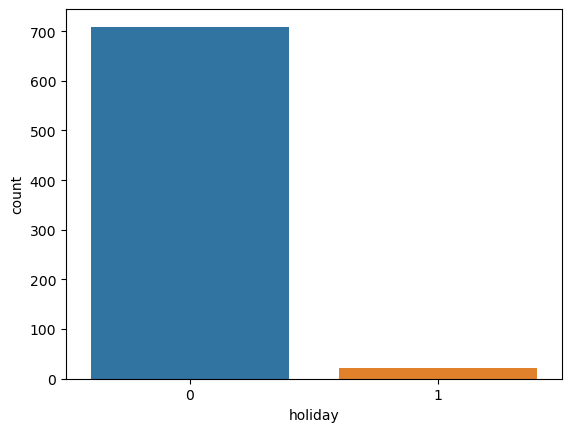

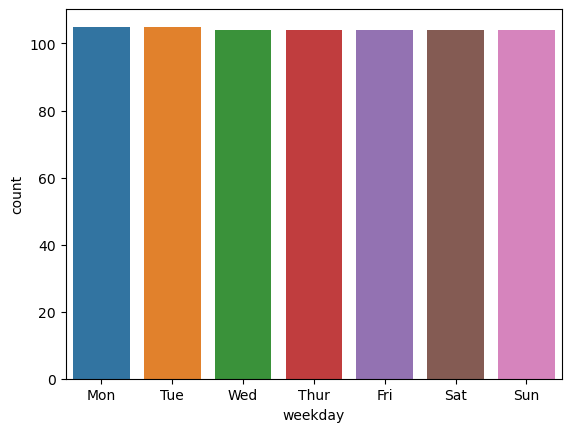

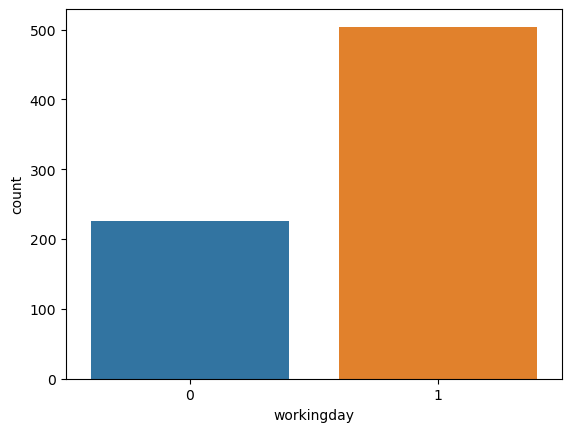

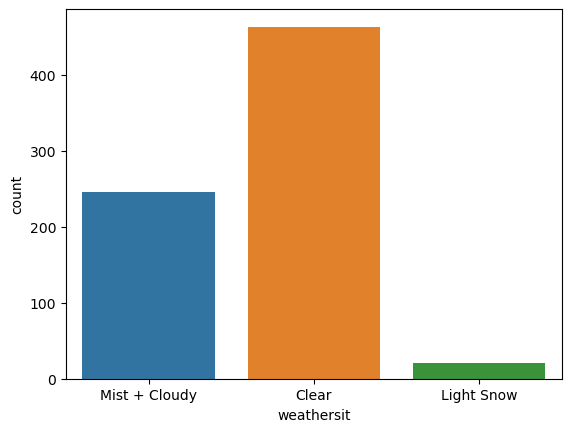

In [24]:
for i in num_cols:
    sns.histplot(x=df1[i])
    plt.show()
for i in cat_cols:
    sns.countplot(x=df1[i])
    plt.show()

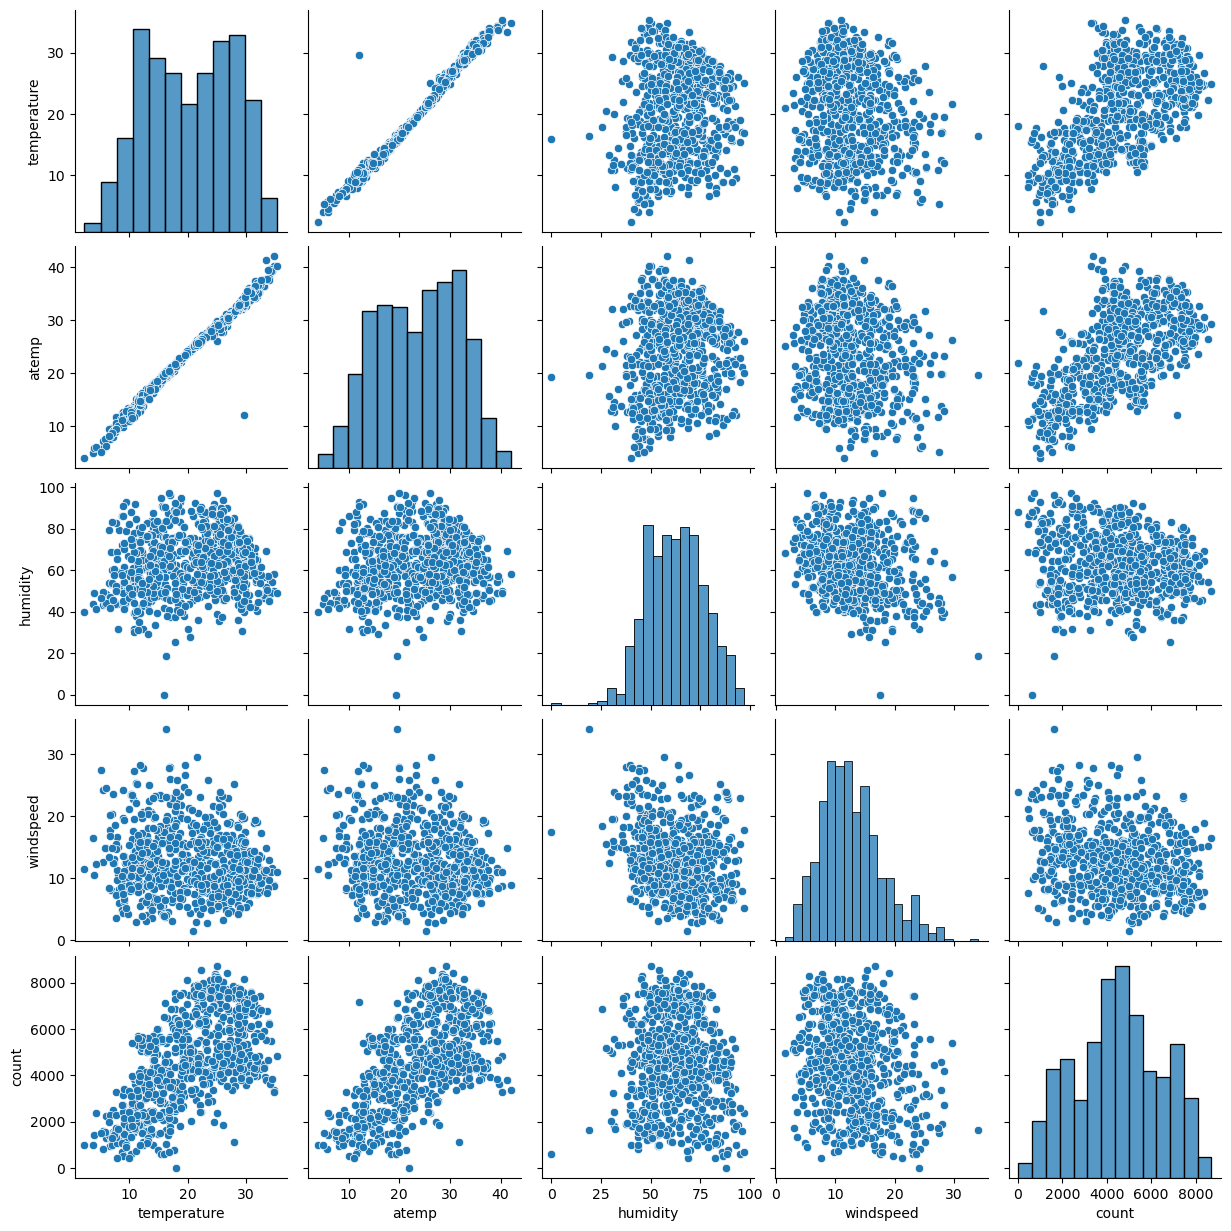

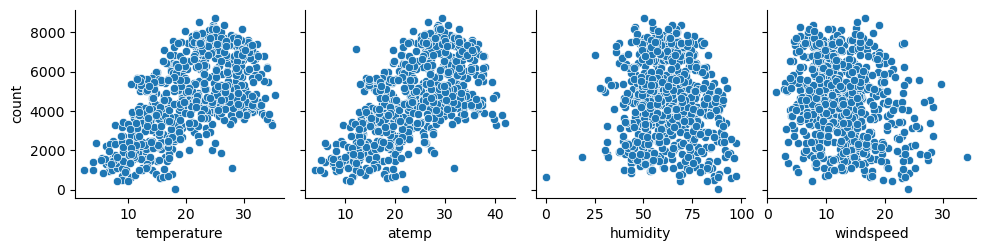

In [25]:
sns.pairplot(df1[num_cols])
plt.show()

sns.pairplot(data = df1, x_vars= ['temperature','atemp','humidity','windspeed'], y_vars='count')
plt.show()

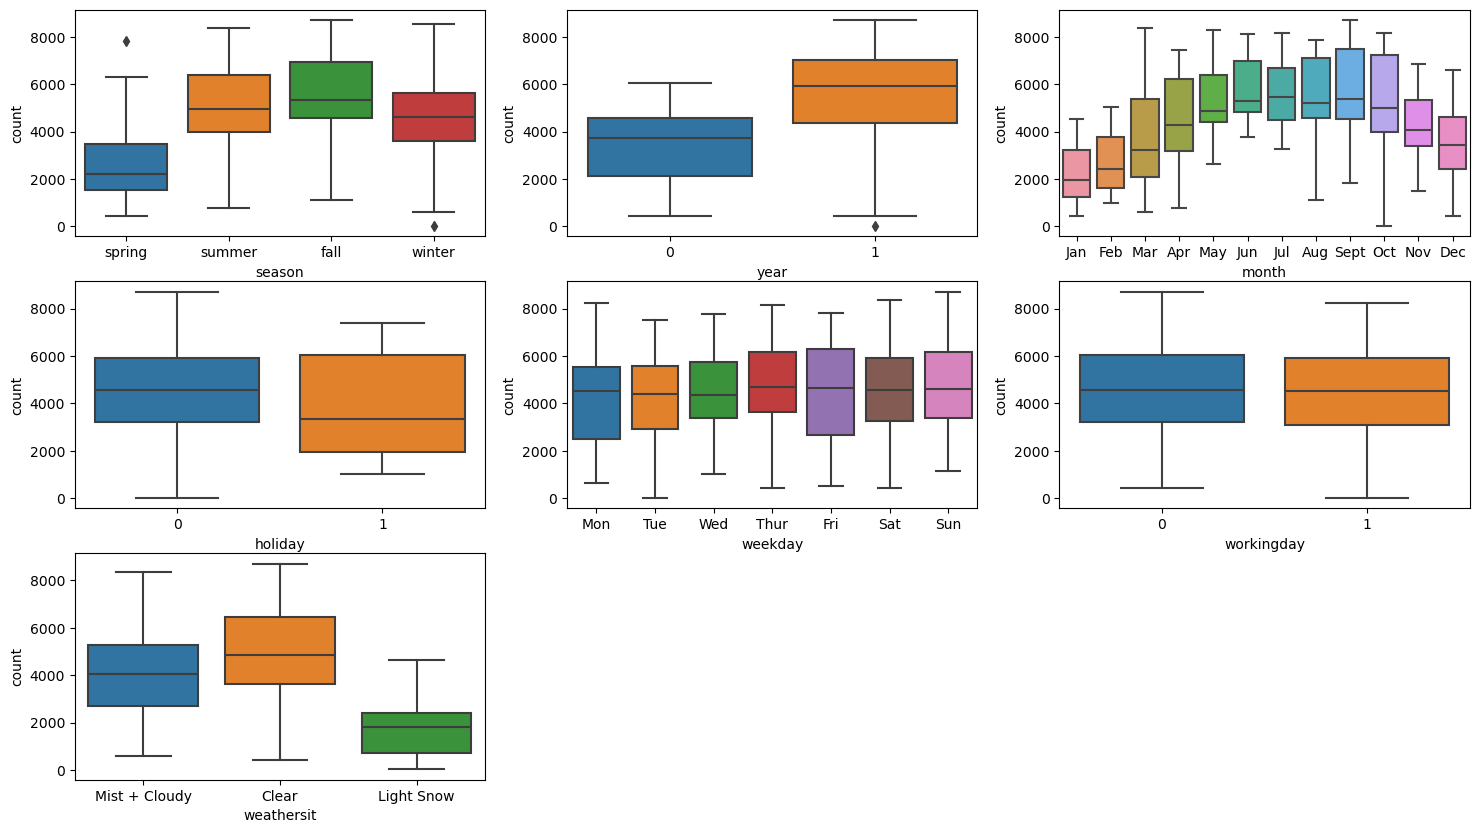

In [26]:
plt.figure(figsize=(18,10))
plt.subplot(3,3,1)
sns.boxplot(x='season',y = 'count', data=df1)
plt.subplot(3,3,2)
sns.boxplot(x='year',y = 'count', data=df1)
plt.subplot(3,3,3)
sns.boxplot(x='month',y = 'count', data=df1)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y = 'count', data=df1)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y = 'count', data=df1)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y = 'count', data=df1)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y = 'count', data=df1)
plt.show()


In [27]:
df1['year'].unique()

array([0, 1], dtype=int64)

In [28]:
year_number = {0:'2018', 1:'2019'}
df1['year'] = df1['year'].map(year_number)

In [29]:
df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,2018,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


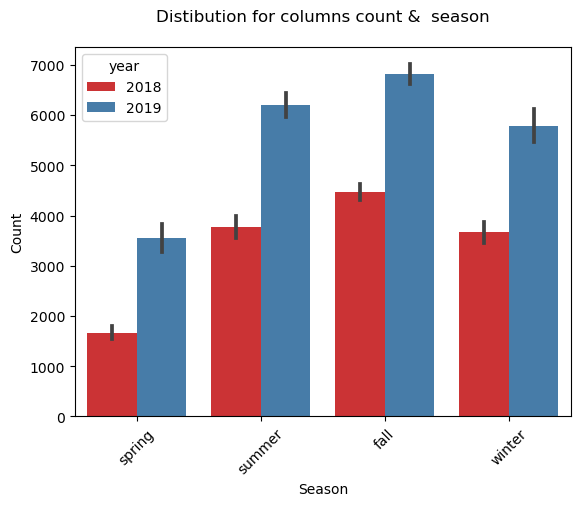

In [30]:
sns.barplot(data =df1, y='count',hue='year',x='season',palette='Set1')
plt.title("Distibution for columns count &  season\n")
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

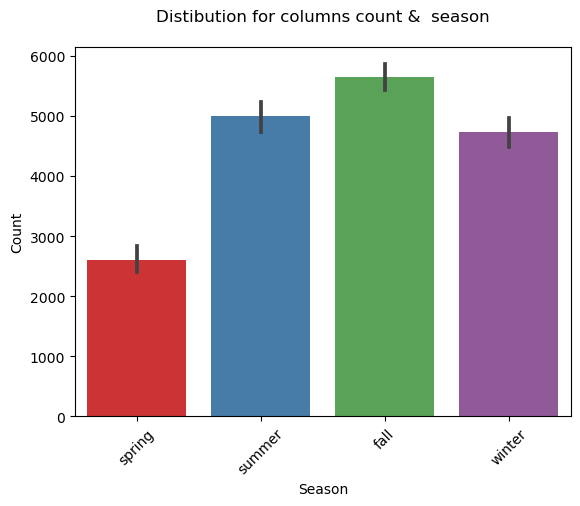

In [31]:
sns.barplot(data =df1, y='count', x='season',palette='Set1')
plt.title("Distibution for columns count &  season\n")
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

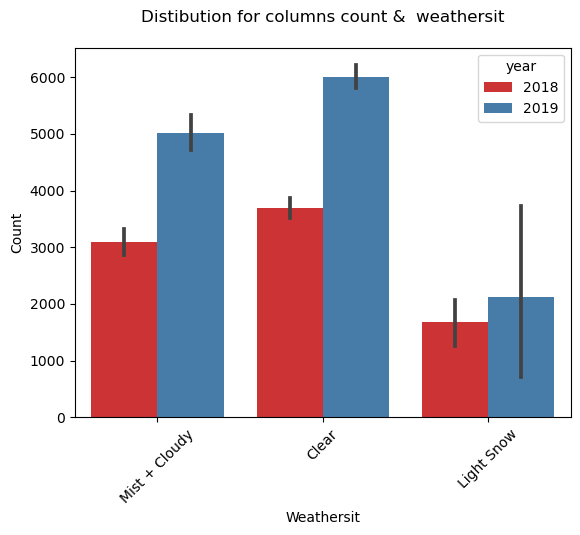

In [32]:
sns.barplot(data =df1, y='count',hue='year',x='weathersit',palette='Set1')
plt.title("Distibution for columns count &  weathersit\n")
plt.xlabel('Weathersit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

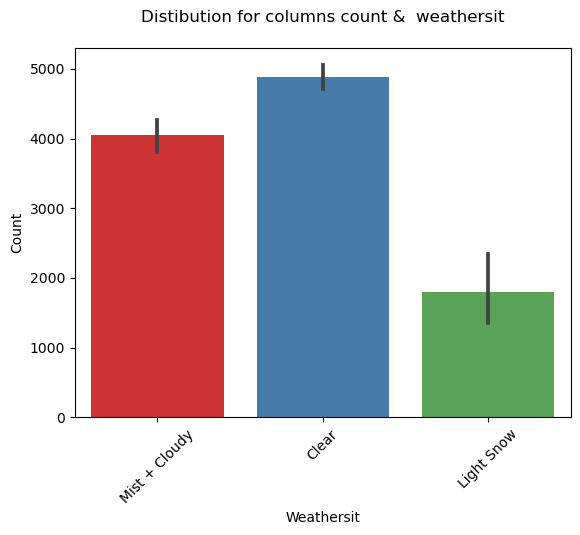

In [33]:
sns.barplot(data =df1, y='count',x='weathersit',palette='Set1')
plt.title("Distibution for columns count &  weathersit\n")
plt.xlabel('Weathersit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

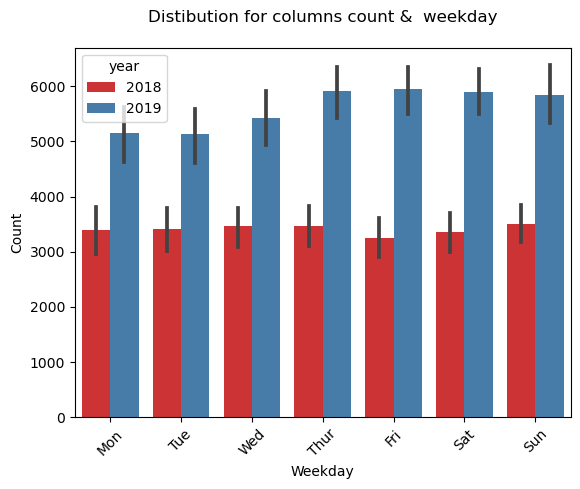

In [34]:
sns.barplot(data =df1, y='count',hue='year',x='weekday',palette='Set1')
plt.title("Distibution for columns count &  weekday\n")
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

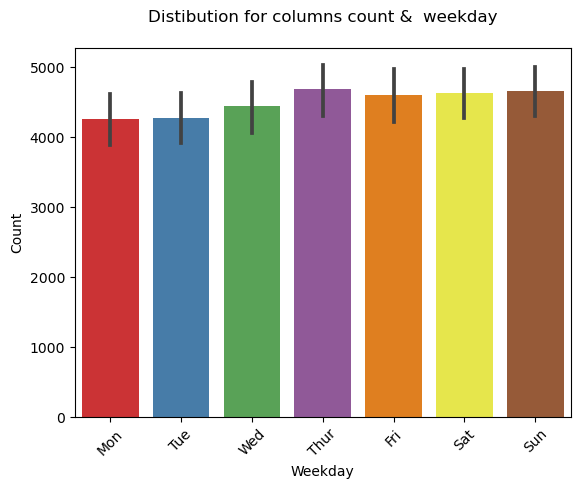

In [35]:
sns.barplot(data =df1, y='count',x='weekday',palette='Set1')
plt.title("Distibution for columns count &  weekday\n")
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

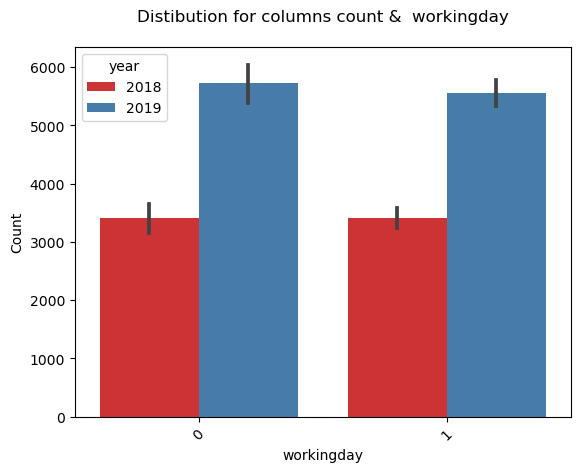

In [36]:
sns.barplot(data =df1, y='count',hue='year',x='workingday',palette='Set1')
plt.title("Distibution for columns count &  workingday\n")
plt.xlabel('workingday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

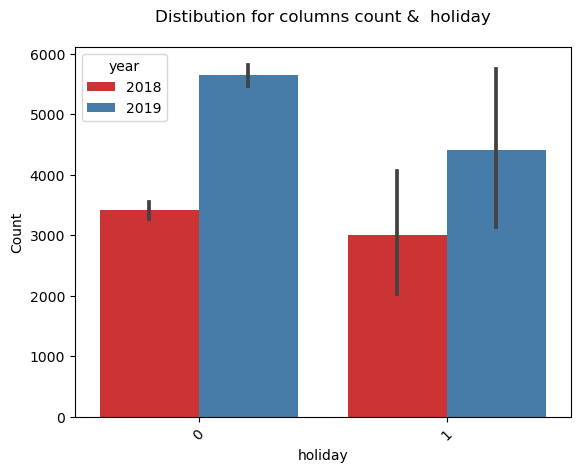

In [37]:
sns.barplot(data =df1, y='count',hue='year',x='holiday',palette='Set1')
plt.title("Distibution for columns count &  holiday\n")
plt.xlabel('holiday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

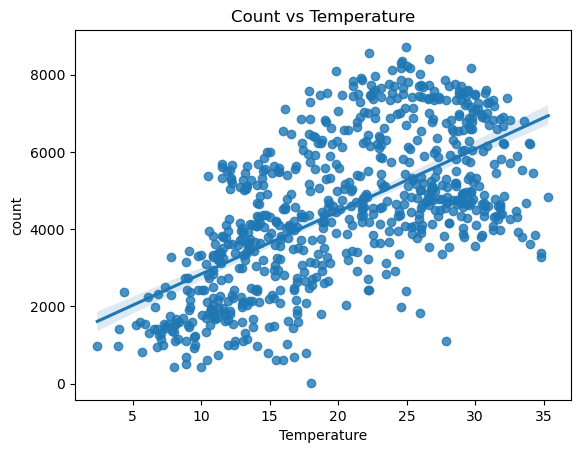

In [38]:
sns.regplot(x='temperature', y='count', data = df1)
plt.title('Count vs Temperature')
plt.xlabel('Temperature')
plt.show()

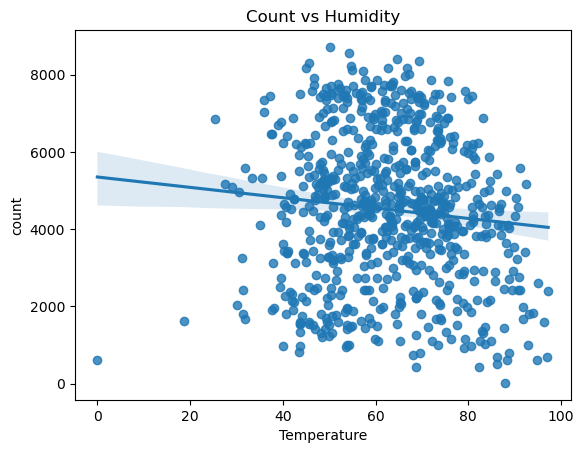

In [39]:
sns.regplot(x='humidity', y='count', data = df1)
plt.title('Count vs Humidity')
plt.xlabel('Temperature')
plt.show()

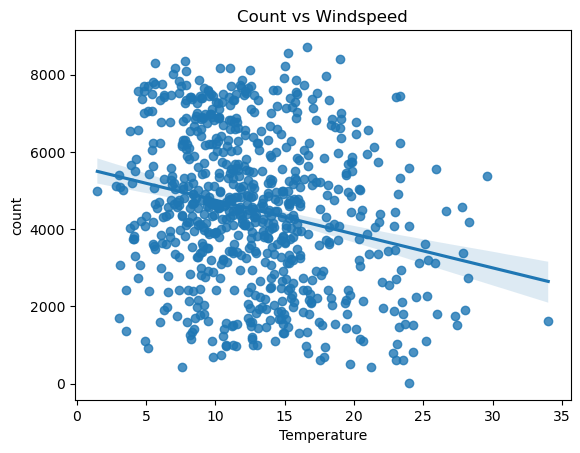

In [40]:
sns.regplot(x='windspeed', y='count', data = df1)
plt.title('Count vs Windspeed')
plt.xlabel('Temperature')
plt.show()

In [41]:
#correlation matrix
df1[num_cols].corr()

,temperature,atemp,humidity,windspeed,count
temperature,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,0.627044,0.630685,-0.098543,-0.235132,1.000000


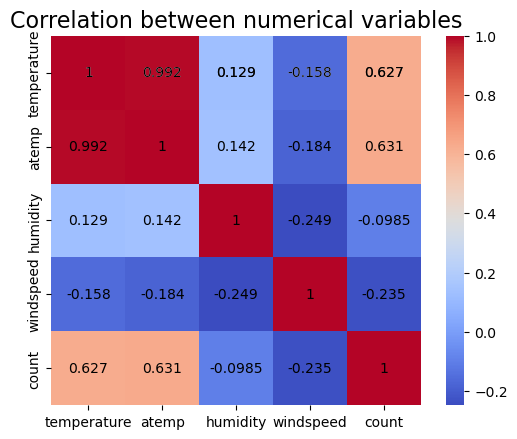

In [42]:
corr_matrix = df1[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3g', cmap="coolwarm", cbar=True, square=True)

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{corr_matrix.iloc[i, j]:.3g}', 
                 ha='center', va='center', color='black')

plt.title('Correlation between numerical variables', fontdict={'fontsize': 16})
plt.show()

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    object 
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  count        730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


In [44]:
year_number = {'2018' : 0, '2019': 1}
df1['year'] = df1['year'].map(year_number)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temperature  730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  count        730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [45]:
df1 = pd.get_dummies(df1, drop_first = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temperature               730 non-null    float64
 4   atemp                     730 non-null    float64
 5   humidity                  730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   count                     730 non-null    int64  
 8   season_spring             730 non-null    bool   
 9   season_summer             730 non-null    bool   
 10  season_winter             730 non-null    bool   
 11  month_Aug                 730 non-null    bool   
 12  month_Dec                 730 non-null    bool   
 13  month_Feb                 730 non-null    bool   
 14  month_Jan 

In [46]:
df1.head(2)

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,False,True,False,False,True


In [47]:
for col in df1.columns:
    if df1[col].dtypes == 'bool':
        df1[col] = df1[col].astype('uint8')

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temperature               730 non-null    float64
 4   atemp                     730 non-null    float64
 5   humidity                  730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   count                     730 non-null    int64  
 8   season_spring             730 non-null    uint8  
 9   season_summer             730 non-null    uint8  
 10  season_winter             730 non-null    uint8  
 11  month_Aug                 730 non-null    uint8  
 12  month_Dec                 730 non-null    uint8  
 13  month_Feb                 730 non-null    uint8  
 14  month_Jan 

In [49]:
df1.head(2)

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1


In [50]:
df1.shape

(730, 30)

### Splitting the data into Test and Train

In [51]:
np.random.seed(0)
df_train, df_test = train_test_split(df1,train_size=0.7,test_size = 0.3,random_state=100)

In [52]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      510 non-null    int64  
 1   holiday                   510 non-null    int64  
 2   workingday                510 non-null    int64  
 3   temperature               510 non-null    float64
 4   atemp                     510 non-null    float64
 5   humidity                  510 non-null    float64
 6   windspeed                 510 non-null    float64
 7   count                     510 non-null    int64  
 8   season_spring             510 non-null    uint8  
 9   season_summer             510 non-null    uint8  
 10  season_winter             510 non-null    uint8  
 11  month_Aug                 510 non-null    uint8  
 12  month_Dec                 510 non-null    uint8  
 13  month_Feb                 510 non-null    uint8  
 14  month_Jan     

### Rescaling the features

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
df_train.head(2)

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
df_train.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'atemp', 'humidity',
       'windspeed', 'count', 'season_spring', 'season_summer', 'season_winter',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thur', 'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [57]:
num_vars = ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

In [58]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [59]:
df_train.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [60]:
df_train[num_vars].describe()

,temperature,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


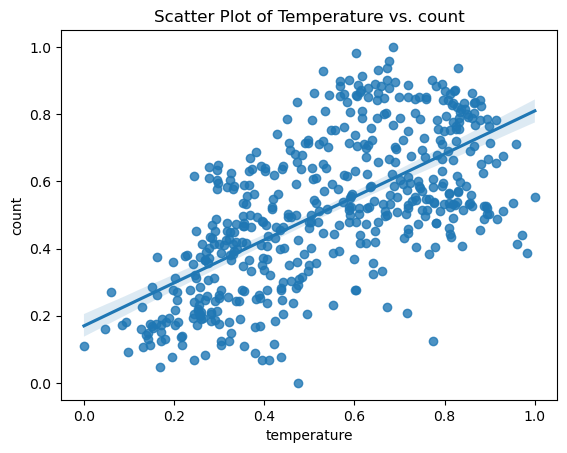

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(data=df_train, x='temperature', y='count')
plt.title("Scatter Plot of Temperature vs. count")
plt.show()


In [62]:
y_train = df_train.pop('count')
X_train = df_train

In [63]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: count, dtype: float64

In [64]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [65]:
y_train = y_train.values.reshape(-1,1)
y_train.shape

(510, 1)

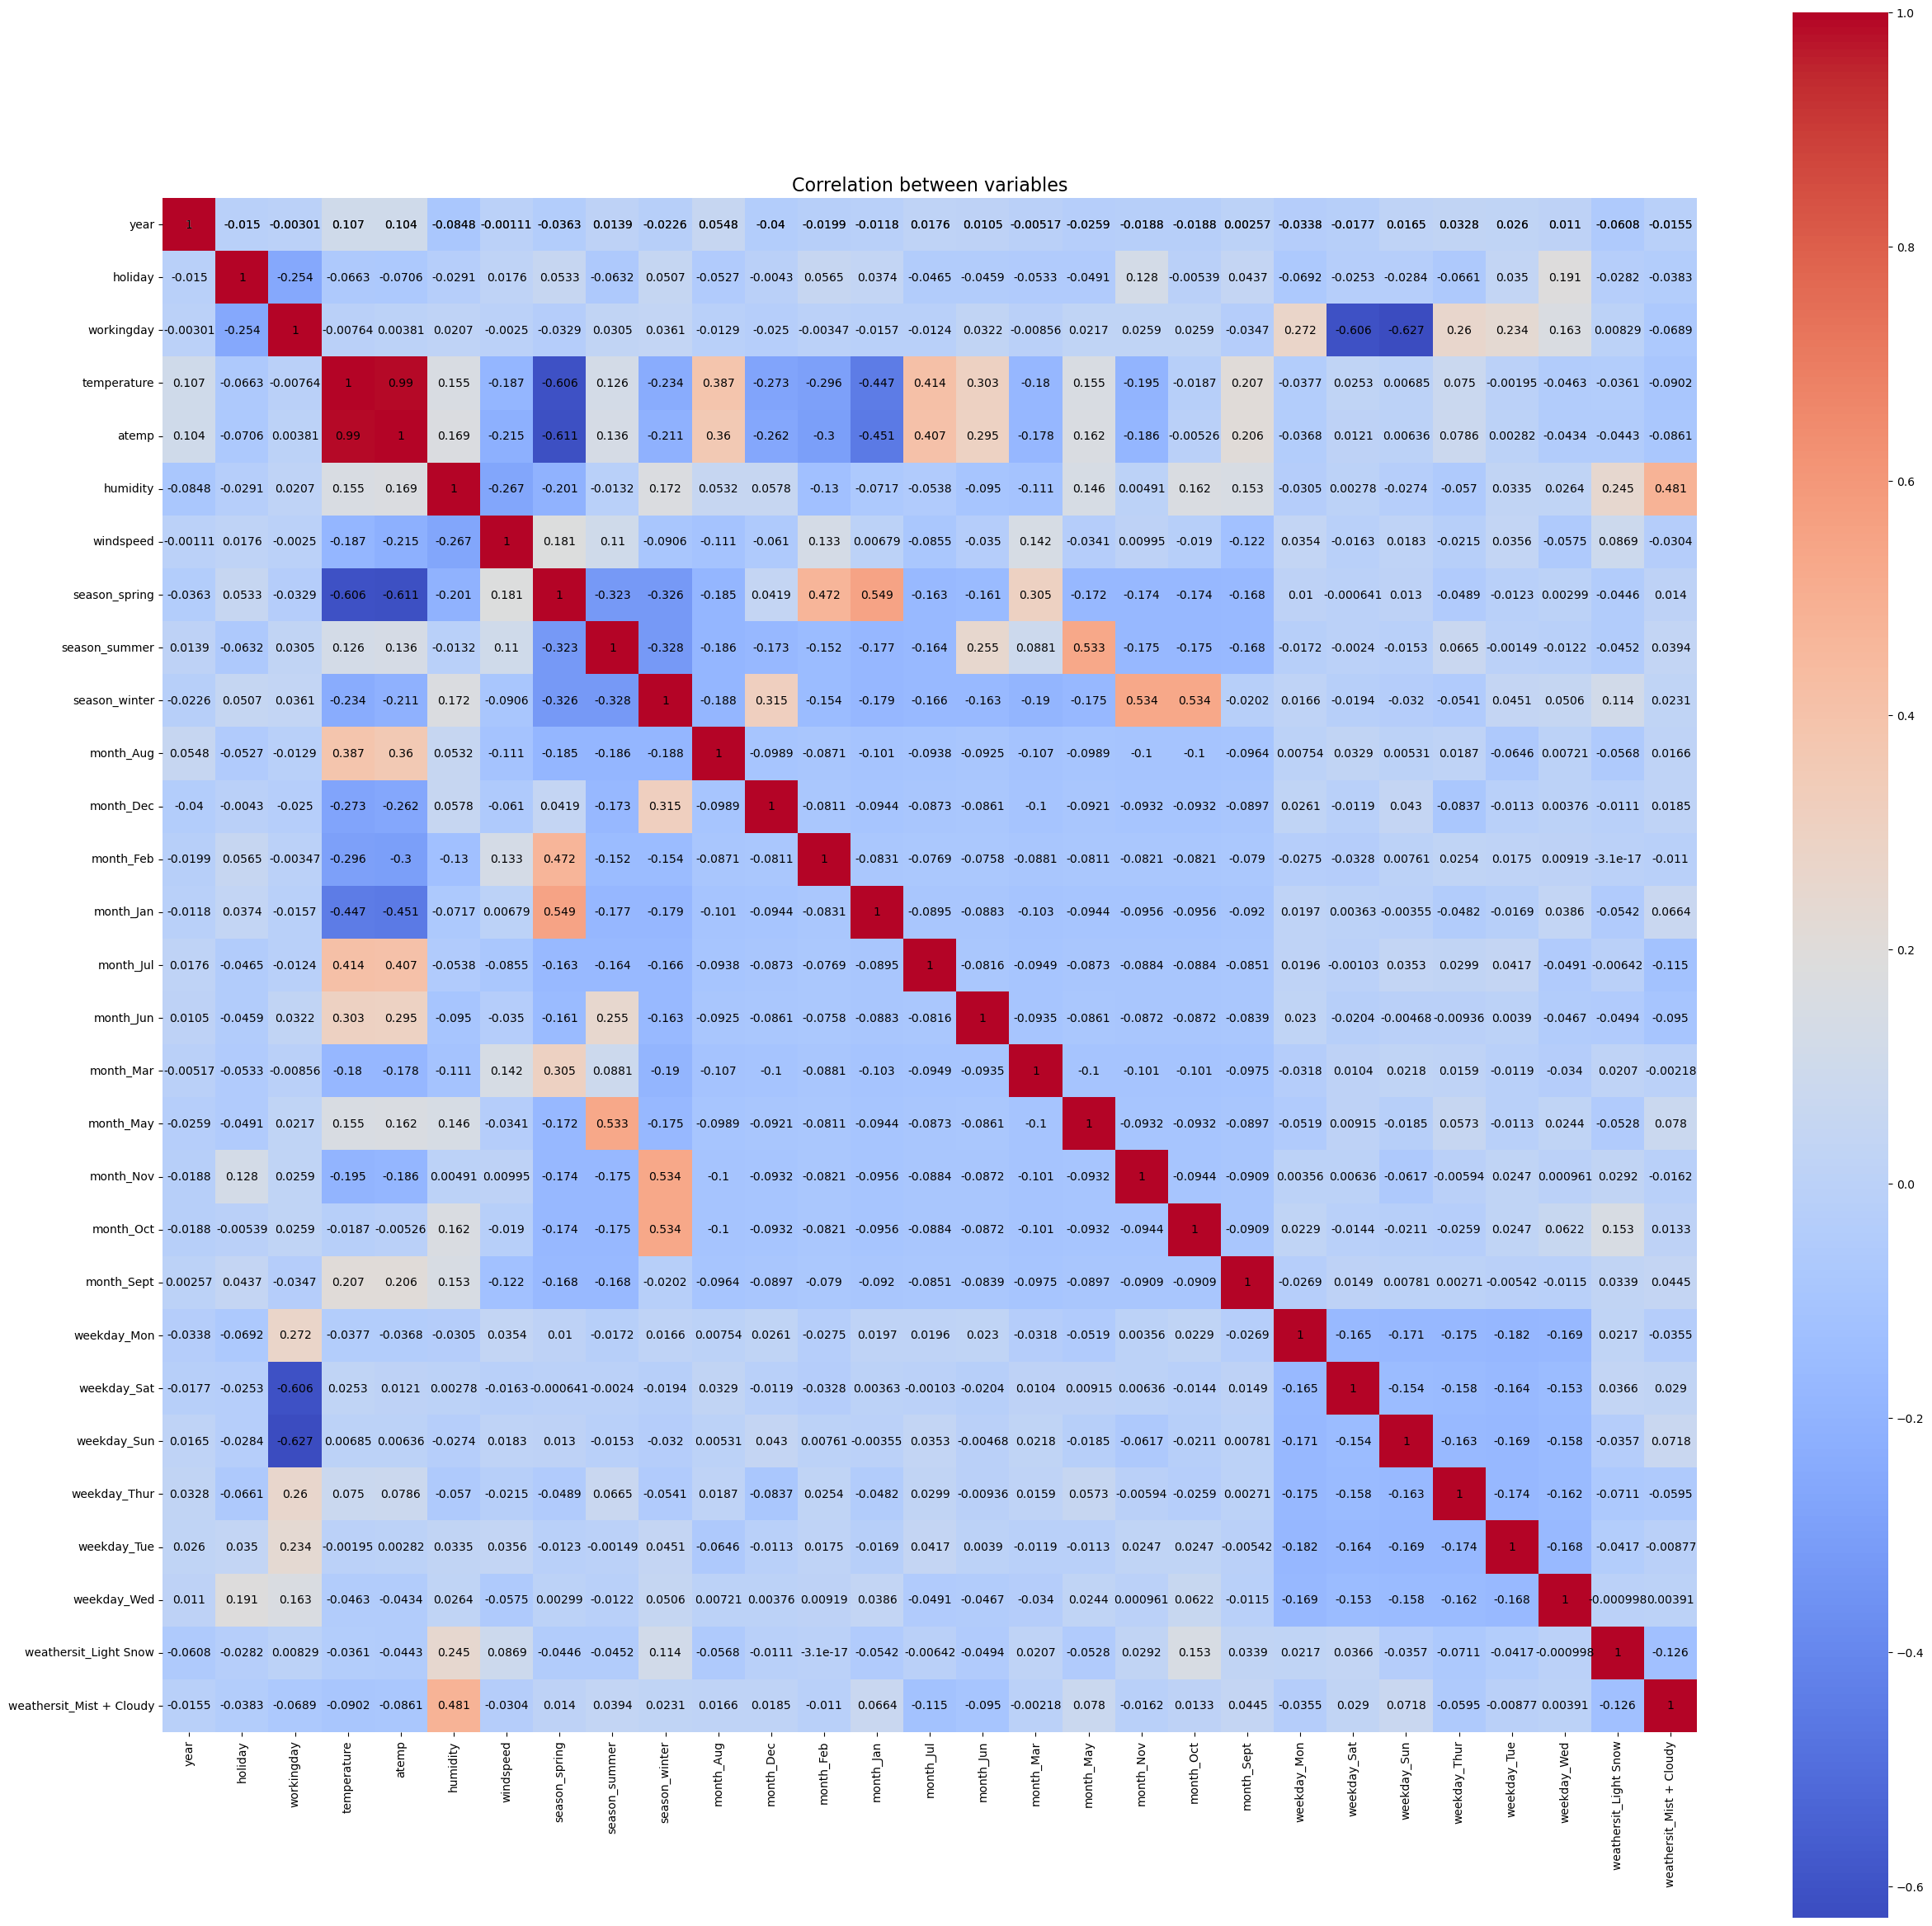

In [66]:
plt.figure(figsize = (30,30))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3g', cmap="coolwarm", cbar=True, square=True)

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{corr_matrix.iloc[i, j]:.3g}', 
                 ha='center', va='center', color='black')

plt.title('Correlation between variables', fontdict={'fontsize': 16})
plt.show()

### Feature Selection

In [67]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns,rfe.support_ , rfe.ranking_ ))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temperature', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 10),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 14),
 ('month_Mar', False, 15),
 ('month_May', False, 7),
 ('month_Nov', True, 1),
 ('month_Oct', False, 12),
 ('month_Sept', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thur', False, 13),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 11),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [69]:
col = X_train.columns[rfe.support_]

In [70]:
X_train.columns[~ rfe.support_]

Index(['workingday', 'atemp', 'month_Aug', 'month_Feb', 'month_Jun',
       'month_Mar', 'month_May', 'month_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thur', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [71]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,year,holiday,temperature,humidity,windspeed,season_spring,season_summer,season_winter,month_Dec,month_Jan,month_Jul,month_Nov,month_Sept,weathersit_Light Snow,weathersit_Mist + Cloudy
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
3,humidity,30.94
2,temperature,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_Mist + Cloudy,2.32
0,year,2.09
11,month_Nov,1.83
9,month_Jan,1.75


### Modelling

In [73]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr = LinearRegression()
lr = sm.OLS(y_train,X_train_lm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          3.34e-189
Time:                        21:05:48   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3202      0.036      8.886      0.000       0.249       0.391
year                         0.2303      0.008     28.511      0.000       0.214       0.246
holiday                     -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temperature                  0.4800      0.037     12.977      0.000       0.407       0.553
humidity                    -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                   -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring               -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer                0.0408      0.015      2.659      0.008       0.011       0.071
season_winter                0.1034      0.018      5.763      0.000       0.068       0.139
month_Dec                   -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_Jan                   -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_Jul                   -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_Nov                   -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_Sept                   0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Light Snow       -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Mist + Cloudy    -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
X_train_1 = X_train_rfe.drop(['humidity'], axis=1)

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temperature,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,year,2.07
10,month_Nov,1.80
8,month_Jan,1.66
9,month_Jul,1.59
13,weathersit_Mist + Cloudy,1.56


In [76]:
X_train_lm1 = sm.add_constant(X_train_1)

In [77]:
lr1 = sm.OLS(y_train,X_train_lm1)
lr1_model = lr1.fit()
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.57e-186
Time:                        21:05:48   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2466      0.032      7.679      0.000       0.184       0.310
year                         0.2343      0.008     28.709      0.000       0.218       0.250
holiday                     -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temperature                  0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                   -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring               -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer                0.0333      0.015      2.148      0.032       0.003       0.064
season_winter                0.0887      0.018      4.951      0.000       0.053       0.124
month_Dec                   -0.0445      0.018     -2.520      0.012      -0.079      -0.010
month_Jan                   -0.0503      0.018     -2.738      0.006      -0.086      -0.014
month_Jul                   -0.0504      0.018     -2.725      0.007      -0.087      -0.014
month_Nov                   -0.0419      0.019     -2.198      0.028      -0.079      -0.004
month_Sept                   0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_Light Snow       -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weathersit_Mist + Cloudy    -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
X_train_2 = X_train_1.drop('season_summer',axis=1)

In [79]:
X_train_2.columns

Index(['year', 'holiday', 'temperature', 'windspeed', 'season_spring',
       'season_winter', 'month_Dec', 'month_Jan', 'month_Jul', 'month_Nov',
       'month_Sept', 'weathersit_Light Snow', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values,i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temperature,4.67
3,windspeed,4.05
5,season_winter,2.54
4,season_spring,2.36
0,year,2.06
9,month_Nov,1.80
7,month_Jan,1.65
12,weathersit_Mist + Cloudy,1.53
6,month_Dec,1.46
8,month_Jul,1.36


In [81]:
X_train_lm = sm.add_constant(X_train_2)
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.params

const                       0.289327
year                        0.234795
holiday                    -0.091280
temperature                 0.402583
windspeed                  -0.154010
season_spring              -0.103373
season_winter               0.064977
month_Dec                  -0.050984
month_Jan                  -0.055626
month_Jul                  -0.064343
month_Nov                  -0.048827
month_Sept                  0.053670
weathersit_Light Snow      -0.294885
weathersit_Mist + Cloudy   -0.081190
dtype: float64

In [82]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.08e-186
Time:                        21:05:48   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2893      0.025     11.427      0.000       0.240       0.339
year                         0.2348      0.008     28.679      0.000       0.219       0.251
holiday                     -0.0913      0.026     -3.496      0.001      -0.143      -0.040
temperature                  0.4026      0.032     12.407      0.000       0.339       0.466
windspeed                   -0.1540      0.025     -6.108      0.000      -0.204      -0.104
season_spring               -0.1034      0.016     -6.613      0.000      -0.134      -0.073
season_winter                0.0650      0.014      4.588      0.000       0.037       0.093
month_Dec                   -0.0510      0.017     -2.918      0.004      -0.085      -0.017
month_Jan                   -0.0556      0.018     -3.047      0.002      -0.091      -0.020
month_Jul                   -0.0643      0.017     -3.705      0.000      -0.098      -0.030
month_Nov                   -0.0488      0.019     -2.593      0.010      -0.086      -0.012
month_Sept                   0.0537      0.016      3.409      0.001       0.023       0.085
weathersit_Light Snow       -0.2949      0.025    -11.954      0.000      -0.343      -0.246
weathersit_Mist + Cloudy    -0.0812      0.009     -9.297      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.224
Skew:                          -0.695   Prob(JB):                     3.65e-41
Kurtosis:                       5.614   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
X_train_3 = X_train_2.drop('month_Nov',axis=1)

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temperature,4.63
3,windspeed,4.00
4,season_spring,2.36
0,year,2.06
5,season_winter,1.64
7,month_Jan,1.64
11,weathersit_Mist + Cloudy,1.53
8,month_Jul,1.36
6,month_Dec,1.29
9,month_Sept,1.20


In [85]:
lr = LinearRegression()
X_train_lm = sm.add_constant(X_train_3)
lr_model = sm.OLS(y_train, X_train_lm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          2.02e-186
Time:                        21:05:48   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2769      0.025     11.074      0.000       0.228       0.326
year                         0.2348      0.008     28.510      0.000       0.219       0.251
holiday                     -0.0994      0.026     -3.812      0.000      -0.151      -0.048
temperature                  0.4200      0.032     13.153      0.000       0.357       0.483
windspeed                   -0.1542      0.025     -6.079      0.000      -0.204      -0.104
season_spring               -0.0997      0.016     -6.369      0.000      -0.130      -0.069
season_winter                0.0482      0.013      3.804      0.000       0.023       0.073
month_Dec                   -0.0340      0.016     -2.086      0.037      -0.066      -0.002
month_Jan                   -0.0506      0.018     -2.769      0.006      -0.086      -0.015
month_Jul                   -0.0671      0.017     -3.849      0.000      -0.101      -0.033
month_Sept                   0.0575      0.016      3.649      0.000       0.027       0.088
weathersit_Light Snow       -0.2904      0.025    -11.735      0.000      -0.339      -0.242
weathersit_Mist + Cloudy    -0.0802      0.009     -9.144      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       62.888   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.760
Skew:                          -0.643   Prob(JB):                     6.74e-34
Kurtosis:                       5.353   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X_train_4 = X_train_3.drop('month_Dec',axis=1)

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temperature,4.63
3,windspeed,4.00
4,season_spring,2.25
0,year,2.06
6,month_Jan,1.60
10,weathersit_Mist + Cloudy,1.53
5,season_winter,1.40
7,month_Jul,1.36
8,month_Sept,1.20
9,weathersit_Light Snow,1.08


In [88]:
lr = LinearRegression()
X_train_lm = sm.add_constant(X_train_4)
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.13e-186
Time:                        21:05:48   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2657      0.025     10.843      0.000       0.218       0.314
year                         0.2348      0.008     28.426      0.000       0.219       0.251
holiday                     -0.0977      0.026     -3.738      0.000      -0.149      -0.046
temperature                  0.4335      0.031     13.817      0.000       0.372       0.495
windspeed                   -0.1482      0.025     -5.863      0.000      -0.198      -0.099
season_spring               -0.1013      0.016     -6.459      0.000      -0.132      -0.071
season_winter                0.0432      0.012      3.462      0.001       0.019       0.068
month_Jan                   -0.0427      0.018     -2.382      0.018      -0.078      -0.007
month_Jul                   -0.0693      0.017     -3.967      0.000      -0.104      -0.035
month_Sept                   0.0587      0.016      3.710      0.000       0.028       0.090
weathersit_Light Snow       -0.2877      0.025    -11.601      0.000      -0.336      -0.239
weathersit_Mist + Cloudy    -0.0802      0.009     -9.106      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       58.998   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.235
Skew:                          -0.614   Prob(JB):                     5.83e-31
Kurtosis:                       5.246   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
X_train_5 = X_train_4.drop('month_Jan',axis=1)

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temperature,4.60
3,windspeed,4.00
0,year,2.06
4,season_spring,1.65
9,weathersit_Mist + Cloudy,1.51
5,season_winter,1.40
6,month_Jul,1.35
7,month_Sept,1.20
8,weathersit_Light Snow,1.08
1,holiday,1.04


In [91]:
lr= LinearRegression()
X_train_lm = sm.add_constant(X_train_5)
lr = sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          1.16e-186
Time:                        21:05:49   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2519      0.024     10.530      0.000       0.205       0.299
year                         0.2341      0.008     28.224      0.000       0.218       0.250
holiday                     -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temperature                  0.4515      0.031     14.758      0.000       0.391       0.512
windspeed                   -0.1398      0.025     -5.559      0.000      -0.189      -0.090
season_spring               -0.1108      0.015     -7.265      0.000      -0.141      -0.081
season_winter                0.0473      0.012      3.804      0.000       0.023       0.072
month_Jul                   -0.0727      0.017     -4.160      0.000      -0.107      -0.038
month_Sept                   0.0577      0.016      3.635      0.000       0.027       0.089
weathersit_Light Snow       -0.2864      0.025    -11.499      0.000      -0.335      -0.237
weathersit_Mist + Cloudy    -0.0811      0.009     -9.182      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
lr_model.params

const                       0.251899
year                        0.234092
holiday                    -0.098556
temperature                 0.451455
windspeed                  -0.139817
season_spring              -0.110795
season_winter               0.047278
month_Jul                  -0.072719
month_Sept                  0.057705
weathersit_Light Snow      -0.286408
weathersit_Mist + Cloudy   -0.081133
dtype: float64

In [93]:
y_train_pred = lr_model.predict(X_train_lm)

In [94]:
y_train_pred = y_train_pred.values.reshape(-1,1)
y_train_pred.shape

(510, 1)

In [95]:
X_train.shape

(510, 29)

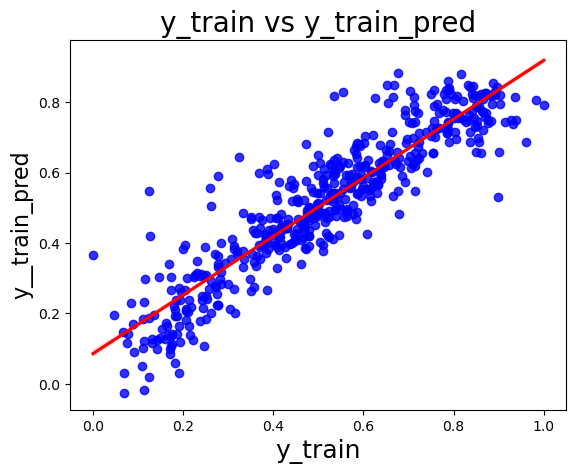

In [96]:
plt.figure()
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y__train_pred', fontsize=16)
plt.show()

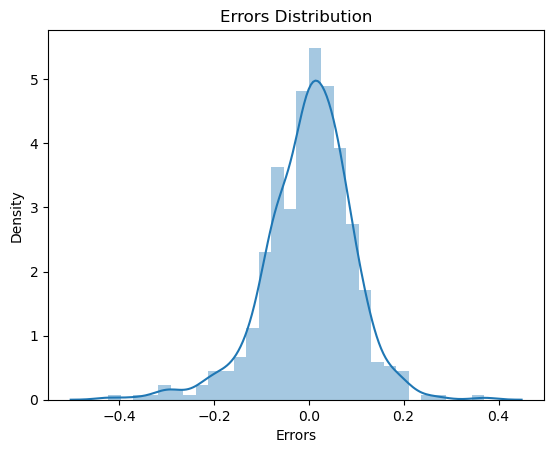

In [97]:
import matplotlib.pyplot as plt
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Errors Distribution')
plt.xlabel('Errors')
plt.show()

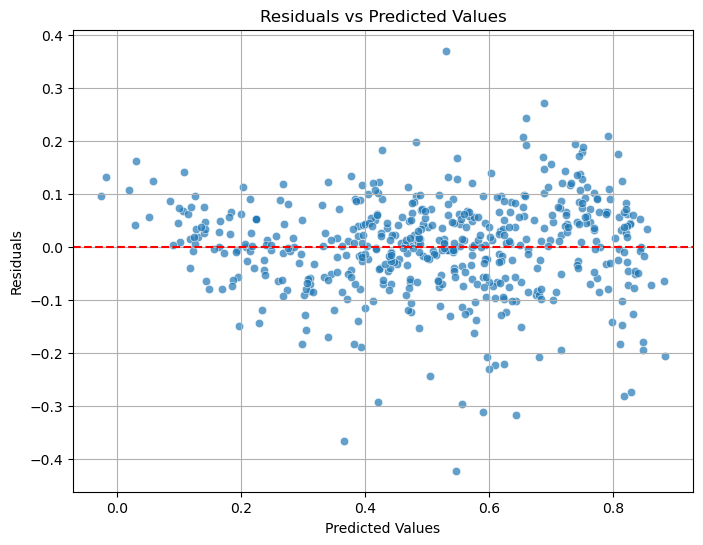

In [98]:
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred.ravel(), y=residuals.ravel(), alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

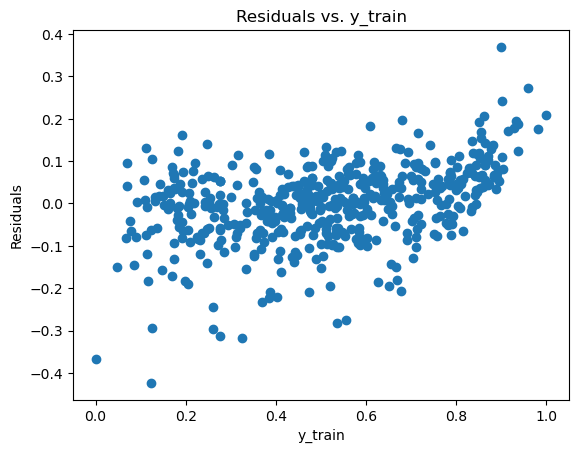

In [99]:
plt.scatter(y_train, res)
plt.ylabel('Residuals') 
plt.xlabel('y_train')
plt.title('Residuals vs. y_train')
plt.show()

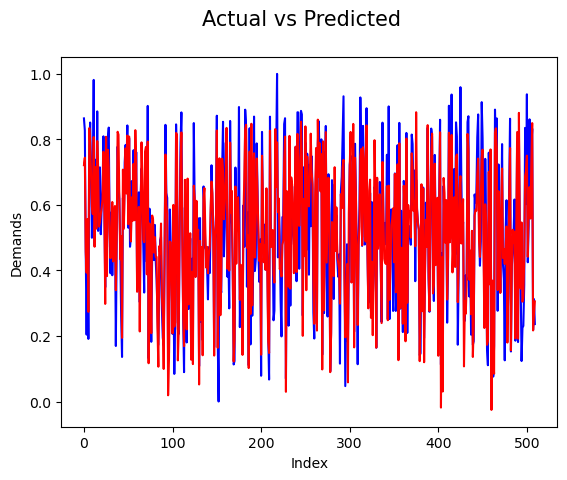

In [100]:
c = [i for i in range(0,len(X_train_5),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

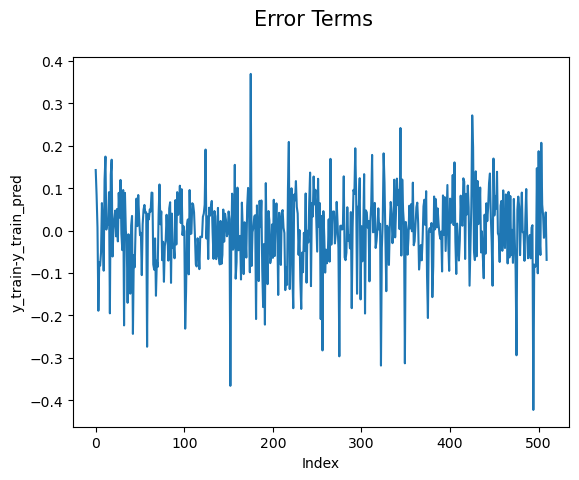

In [101]:
c = [i for i in range(0,len(X_train_5),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [102]:
r2_score(y_train,y_train_pred)

0.8328664237258241

### Predicting the values for the Test data set using Final Model

In [103]:
num_vars

['temperature', 'atemp', 'humidity', 'windspeed', 'count']

In [104]:
num_vars = ['temperature', 'atemp', 'humidity', 'windspeed','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [105]:
df_test.describe()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
y_test = df_test.pop('count')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      219 non-null    int64  
 1   holiday                   219 non-null    int64  
 2   workingday                219 non-null    int64  
 3   temperature               219 non-null    float64
 4   atemp                     219 non-null    float64
 5   humidity                  219 non-null    float64
 6   windspeed                 219 non-null    float64
 7   season_spring             219 non-null    uint8  
 8   season_summer             219 non-null    uint8  
 9   season_winter             219 non-null    uint8  
 10  month_Aug                 219 non-null    uint8  
 11  month_Dec                 219 non-null    uint8  
 12  month_Feb                 219 non-null    uint8  
 13  month_Jan                 219 non-null    uint8  
 14  month_Jul     

In [107]:
X_test.shape

(219, 29)

In [108]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      219 non-null    int64  
 1   holiday                   219 non-null    int64  
 2   workingday                219 non-null    int64  
 3   temperature               219 non-null    float64
 4   atemp                     219 non-null    float64
 5   humidity                  219 non-null    float64
 6   windspeed                 219 non-null    float64
 7   season_spring             219 non-null    uint8  
 8   season_summer             219 non-null    uint8  
 9   season_winter             219 non-null    uint8  
 10  month_Aug                 219 non-null    uint8  
 11  month_Dec                 219 non-null    uint8  
 12  month_Feb                 219 non-null    uint8  
 13  month_Jan                 219 non-null    uint8  
 14  month_Jul     

In [109]:
X_train_5.columns

Index(['year', 'holiday', 'temperature', 'windspeed', 'season_spring',
       'season_winter', 'month_Jul', 'month_Sept', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [110]:
col1 = X_train_5.columns
X_test = X_test[col1]
X_test.head()

,year,holiday,temperature,windspeed,season_spring,season_winter,month_Jul,month_Sept,weathersit_Light Snow,weathersit_Mist + Cloudy
184,0,1,0.831783,0.084219,0,0,1,0,0,1
535,1,0,0.901354,0.153728,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0


In [111]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: count, Length: 219, dtype: float64

In [112]:
lr = LinearRegression()
X_test_sm = sm.add_constant(X_test)
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     219 non-null    float64
 1   year                      219 non-null    int64  
 2   holiday                   219 non-null    int64  
 3   temperature               219 non-null    float64
 4   windspeed                 219 non-null    float64
 5   season_spring             219 non-null    uint8  
 6   season_winter             219 non-null    uint8  
 7   month_Jul                 219 non-null    uint8  
 8   month_Sept                219 non-null    uint8  
 9   weathersit_Light Snow     219 non-null    uint8  
 10  weathersit_Mist + Cloudy  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [113]:
y_test_pred = lr_model.predict(X_test_sm)

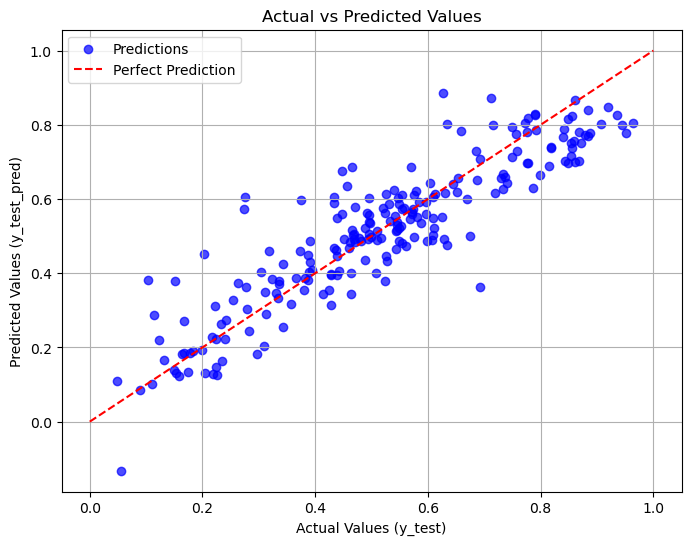

In [114]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, label='Predictions')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_pred)')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

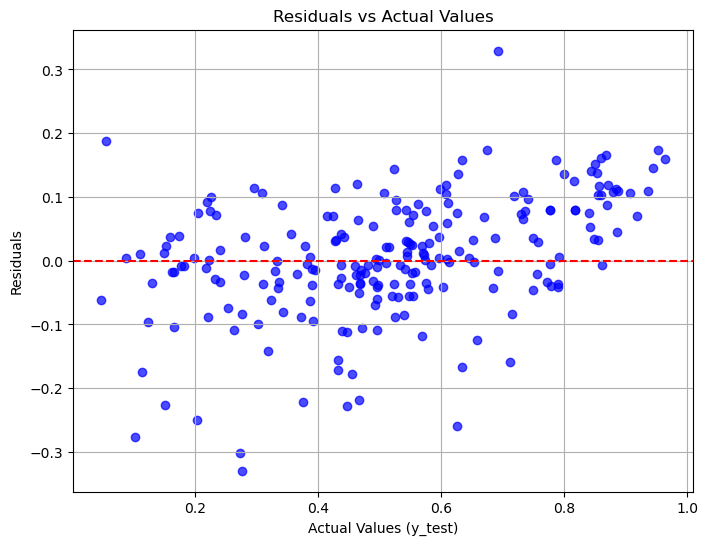

In [115]:
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--') 
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.grid(True)
plt.show()

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print(f"R^2: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R^2: 0.81
Mean Squared Error: 0.01
Mean Absolute Error: 0.07


In [117]:
r2 = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)

print(f"R^2: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R^2: 0.83
Mean Squared Error: 0.01
Mean Absolute Error: 0.07


In [118]:
r2 = r2_score(y_test, y_test_pred)

In [119]:
r2

0.8070101019557963

In [120]:
n = X_test.shape[0]

In [121]:
p = X_test.shape[1]

In [122]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7977317414729018

### Final Result Comparison

In [123]:
import matplotlib.pyplot as plt

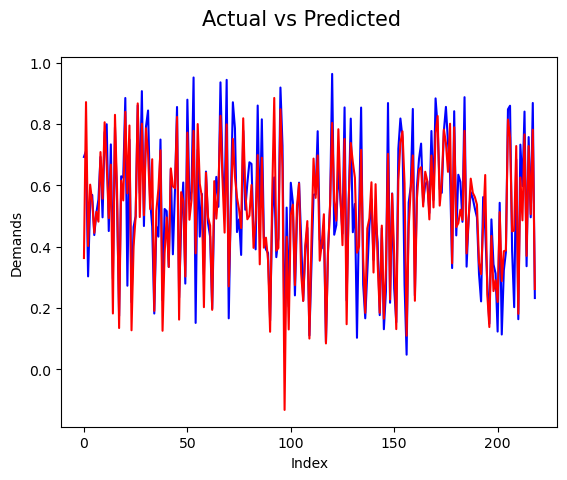

In [124]:
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

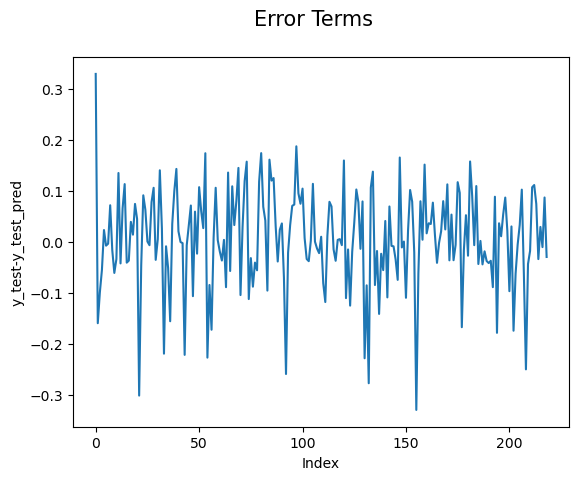

In [125]:
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test-y_test_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_test-y_test_pred')
plt.show()

### Key Takeaways: